In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#data files
florida_county_file = "Florida/Florida_COVID19_Cases_by_County.csv"
florida_race_file = "Florida/florida-race-ethnicity-historical.csv"

#read data 
florida_county_cases = pd.read_csv(florida_county_file)
florida_race_cases = pd.read_csv(florida_race_file)

In [2]:
florida_county_cases.head()

,OBJECTID,OBJECTID_12_13,DEPCODE,COUNTY,COUNTYNAME,County_1,State,PUIsTotal,Age_0_4,Age_5_14,...,EverMon,MonNow,Shape__Area,Shape__Length,GlobalID,NewPos,NewNeg,NewTested,NewPercPos,MedianAge
0,1,1,21,41,GILCHRIST,Gilchrist,FL,2357,69,206,...,1360,1343,9.204908e+08,148547.3480,cb6285a2-da2e-4583-aad5-1221776836ae,4,53,57,0.070175,40
1,2,2,54,107,PUTNAM,Putnam,FL,9872,323,951,...,2932,2876,2.142439e+09,232574.9257,ce511c5d-2638-44a3-b2f8-b13847543637,9,199,208,0.043269,42
2,3,3,62,123,TAYLOR,Taylor,FL,4215,134,393,...,2527,2431,2.685253e+09,267348.1790,541bd5a3-4453-499a-9896-f0edc5353d0b,6,80,86,0.069767,41
3,4,4,46,91,OKALOOSA,Okaloosa,FL,30535,707,3413,...,26885,26472,2.369223e+09,330553.1603,eb5d2450-a892-40fd-9ba4-9821a7438525,152,876,1028,0.147860,40
4,5,5,7,13,CALHOUN,Calhoun,FL,2740,78,349,...,2223,2166,1.487627e+09,192207.8903,3b55aa95-5170-4caf-82a3-e99ad7459349,3,85,88,0.034091,46


In [3]:
#Remove rows that are not needed
florida_county_cases = florida_county_cases.drop(["OBJECTID", "OBJECTID_12_13", "DEPCODE", "C_EDYes_Res", "C_EDYes_NonRes", "C_HospYes_Res", "C_HospYes_NonRes", "C_NonResDeaths", "C_FLResDeaths", "CasesAll", "Shape__Area", "Shape__Length", "GlobalID", "PUIAgeRange", "PUIAgeMedian", "PUIFemale", "PUIMale", "PUISexUnkn", "PUIFLRes", "PUINotFLRes", "PUIFLResOut", "PUIContNo", "PUIContUnkn", "PUIAgeAvrg", "PUITravelNo", "PUITravelYes", "T_LabPrivate_Res", "T_LabDOH_Res", "T_LabPrivate_NonRes", "T_LabDOH_NonRes", "C_EDYes_Res", "C_HospYes_Res", "C_HospYes_NonRes", "C_NonResDeaths", "C_FLResDeaths", "C_FLRes", "C_NotFLRes", "C_FLResOut", "T_NegRes", "T_NegNotFLRes", "EverMon", "MonNow", "Shape__Area", "Shape__Length", "GlobalID", "NewPos", "NewNeg", "NewTested", "NewPercPos", "MedianAge", "County_1", "C_Age_0_4", "C_Age_5_14", "C_Age_15_24", "C_Age_25_34" , "C_Age_35_44", "C_Age_45_54", "C_Age_55_64", "C_Age_65_74", "C_Age_75_84", "C_Age_85plus", "C_Age_Unkn", "C_AgeMedian", "C_EDYes_Res", "C_HospYes_Res", "C_HospYes_NonRes", "C_NonResDeaths", "COUNTY", "PUIsTotal", "C_AgeRange",  "C_Men", "C_Women"], axis=1) 
florida_county_cases.tail()

,COUNTYNAME,State,Age_0_4,Age_5_14,Age_15_24,Age_25_34,Age_35_44,Age_45_54,Age_55_64,Age_65_74,...,C_RaceBlack,C_RaceOther,C_RaceUnknown,C_HispanicYES,C_HispanicNO,C_HispanicUnk,T_total,T_negative,T_positive,Deaths
64,FRANKLIN,FL,68,216,256,292,273,274,345,280,...,269,38,31,84,1066,97,7094,5806,1278,14
65,ALACHUA,FL,652,1541,10251,6446,4645,4217,4306,3077,...,5118,2207,2298,2760,16607,2659,170341,148016,22272,228
66,ST. JOHNS,FL,874,4793,7069,3811,5072,5390,4823,3517,...,1087,1431,2593,1375,13941,4394,117569,97506,19982,189
67,Unknown,FL,47,158,669,727,660,653,599,423,...,50,101,91,94,179,95,36915,33416,3446,0
68,A State,FL,70190,205020,398923,454306,425092,437513,415469,295316,...,245411,276226,300605,589044,888101,380525,11012025,9110793,1892301,30478


In [4]:
#create variable for final row which contains totals 
total_numbers = florida_county_cases.loc[68]
total_numbers

COUNTYNAME        A State
State                  FL
Age_0_4             70190
Age_5_14           205020
Age_15_24          398923
Age_25_34          454306
Age_35_44          425092
Age_45_54          437513
Age_55_64          415469
Age_65_74          295316
Age_75_84          165303
Age_85plus          76312
Age_Unkn             6767
TPositive         1892306
TNegative         1049183
TInconc               358
TPending             8364
T_Total_Res       2894484
C_Female           971117
C_Male             872861
C_SexUnkn           13692
C_AllResTypes     1857670
C_RaceWhite       1035428
C_RaceBlack        245411
C_RaceOther        276226
C_RaceUnknown      300605
C_HispanicYES      589044
C_HispanicNO       888101
C_HispanicUnk      380525
T_total          11012025
T_negative        9110793
T_positive        1892301
Deaths              30478
Name: 68, dtype: object

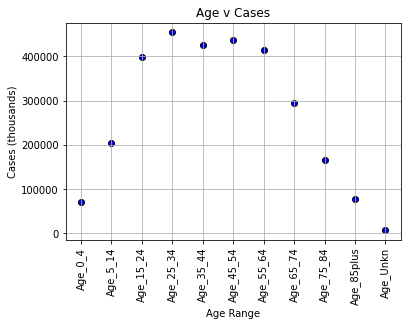

In [5]:
#Scatter plot age vs cases
Age = ["Age_0_4", "Age_5_14", "Age_15_24", "Age_25_34", "Age_35_44", "Age_45_54", "Age_55_64", "Age_65_74", "Age_75_84", "Age_85plus", "Age_Unkn"]
Cases = [70190, 205020, 398923, 454306,  425092, 437513, 415469, 295316, 165303, 76312, 6767]
plt.title("Age v Cases")
plt.xlabel("Age Range")
plt.ylabel("Cases (thousands)")
plt.xticks(rotation="vertical")
plt.grid()
plt.scatter(Age, Cases, marker="o", facecolors="blue", edgecolors="black")

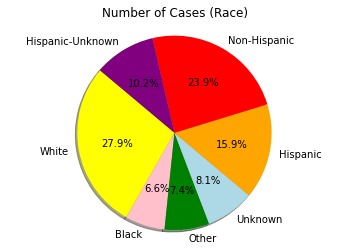

In [6]:
#Pie chart number of cases (race)
Race = ["C_RaceWhite ", "C_RaceBlack", "C_RaceOther", "C_RaceUnknown", "C_HispanicYES ", "C_HispanicNO ", "C_HispanicUnk"]
Race_case_count = [1035428,245411,276226,300605,589044,888101,380525]
colors = ["yellow", "pink", "green","lightblue","orange","red","purple"]
labels = ("White", "Black", "Other", "Unknown", "Hispanic", "Non-Hispanic", "Hispanic-Unknown")
plt.pie(Race_case_count, labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Number of Cases (Race)")
plt.axis("equal")
plt.show()

<BarContainer object of 3 artists>

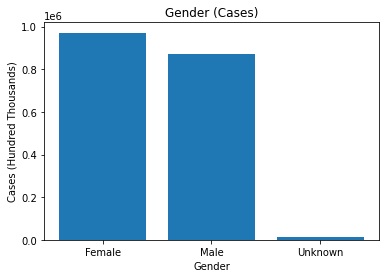

In [14]:
#Bar chart number of cases (gender)
gender = ("Female", "Male", "Unknown")
x_pos = np.arange(len(gender))
cases = [971117, 872861 , 13692]
plt.title("Gender (Cases)")
plt.xlabel("Gender")
plt.ylabel("Cases (Hundred Thousands)")
plt.xticks(x_pos, gender)
plt.bar(x_pos, cases)

In [8]:
#Not able to use data from this CSV - incomplete
florida_race_cases.head()

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NHPI,Cases_Multiracial,Cases_LatinX,...,Tests_Black,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown,Tests_LatinX,Tests_Multiracial,Tests_NHPI,Tests_Other,Tests_White,Tests_Total
0,FL,20210224,NaN,NaN,230333.0,640042.0,136314.0,NaN,NaN,586613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FL,20210221,NaN,NaN,228211.0,633358.0,134722.0,NaN,NaN,580870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FL,20210217,NaN,NaN,224912.0,623935.0,132673.0,NaN,NaN,572623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FL,20210214,NaN,NaN,222833.0,616930.0,131132.0,NaN,NaN,567024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FL,20210210,NaN,NaN,218927.0,605295.0,128566.0,NaN,NaN,557320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#florida_race_cases = florida_race_cases.drop(["State", "Date", "Cases_Asian", "Cases_AIAN", "Cases_Black", "Cases_White", "Cases_Other", "Cases_NHPI", "Cases_Multiracial", "Cases_LatinX", "Cases_Ethnicity_NonHispanic", "Cases_Ethnicity_Hispanic", "Cases_Ethnicity_Unknown", "Cases_Total", "Deaths_Ethnicity_Hispanic", "Deaths_Ethnicity_NonHispanic", "Hospitalizations_AIAN", "Hospitalizations_Asian", "Hospitalizations_Black", "Hospitalizations_Ethnicity_Hispanic", "Hospitalizations_Ethnicity_NonHispanic", "Hospitalizations_Ethnicity_Unknown", "Hospitalizations_LatinX", "Hospitalizations_Multiracial", "Hospitalizations_NHPI", "Hospitalizations_Other", "Hospitalizations_White", "Hospitalizations_Total", "Tests_AIAN", "Tests_Asian", "Tests_Black", "Tests_Ethnicity_Hispanic", "Tests_Ethnicity_NonHispanic", "Tests_Ethnicity_Unknown", "Tests_LatinX", "Tests_Multiracial", "Tests_NHPI", "Tests_Other", "Tests_White", "Tests_Total"])
#florida_race_cases.head()                                              